#### Name: Ben Maxwell 

# PHYS 230 Lab Assignment 8

### Wednesday, February 18: Chapter 5.1-5.3
- Evaluating integrals in python 
    - Trapezoidal Rule
    - Simpson's Rule

#### Start by importing any packages you need below (feel free to update as you go):

In [33]:
import numpy as np
import matplotlib.pyplot as plt

## The overall goal of lab today 

Today we are going to evaluate the integral: 
$$\int_{1.1}^{10.1} \frac{\sin{x}}{\ln{x}} \,dx $$

### Step 1 (10 pts)

Write a user-defined function `f(x)` to evaluate the given **function** in the integral. Include comments in your code (and markdown cell, if necessary) explaining your process. 

In [9]:
#Making a function that returns f(x)
def f(x):
    return np.sin(x)/np.log(x)

I made a function that returns that value of sin(x)/ln(x). 

### Applying Trapezoidal Rule (22 pts)


Write a code to do the following: 
- Create a user-defined function `trapezoidal_int(a,b,N,f)` to determine the integral using the trapezoidal rule using your function defined above 

    - here: a = the lower limit of the integrand, b = upper limit, N = number of steps, and f = the function from above 
- Do so using $N = 100$ steps
- Do so again by doubling the number of steps and seeing how much the result accuracy changes by. 
- Estimate the error on the result using the equation discussed in class. 

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code

In [10]:
# Function to integrate using Trapezoidal Rule 
#Making my user defined function
def trapezoidal_int(a,b,N,f):

#Calculate h
    h = (b-a)/N

#Integrate using the trapezoidal rule
# Define sum variable
    S = 0.5*f(a)+0.5*f(b)
    for k in range(1,N):
        S += f(a+k*h)
    I = S*h
    return I


This user function takes 4 values, which are a, b, N, and f (as specified above.) Then from this, I calculated h as (b-a)/N. Then I calculate my trapezoid sum by adding 1/2f(a) and 1/2f(b) to the sum. Then, I go through all values from 1 to N-1 and calculate f(a+kh) and then add them to my sum S. Finally, I multiply S by h, and return my final answer which is I. 

In [ ]:
# N = 100 steps 
print(trapezoidal_int(1.1,10.1,100,f))

2.9021883624907003


In [12]:
# double steps 
print(trapezoidal_int(1.1,10.1,200,f))


2.8628779013854735


In [20]:
# estimate error 
print("The error is", np.abs((trapezoidal_int(1.1,10.1,200,f)-(trapezoidal_int(1.1,10.1,100,f)))/3))

The error is 0.013103487035075615


### Applying Simpson's Rule (22 pts)

Write a code to do the following: 
- Create a user-defined function `simpsons_int(a,b,N,f)` to determine the integral using Simpson's rule using your function defined above 

    - here: a = the lower limit of the integrand, b = upper limit, N = number of steps, and f = the function from above 
- Do so using $N = 50$ steps [note this is half of the initial steps used in trapezoidal]
- Do so again by doubling the number of steps and seeing how much the result accuracy changes by. 
- Estimate the error on the result using the equation discussed in class. 

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code. 

In [15]:
# Function to integrate using Simpson's Rule 
#Making my user defined function
def simpsons_int(a,b,N,f):

#Calculate h
    h = (b-a)/N

#Integrate using the trapezoidal rule
# Define sum variable
    S = f(a)+f(b)
    for k in range(1,N):
        if k%2 == 0: #Is an even number
            S += 2*f(a+k*h)
        if k%2 == 1: #Is an odd number
            S += 4*f(a+k*h)
#Returns the final integral
    I = S*h/3
    return I

To start my code I define a function that takes in a, b, N, and f as described above. Then, I calculate h the same way I did in the trapezoidal some. Then, I start calculating my sum by adding f(a) and f(b) to it. Then, I go through all values of k from 1 to N-1. For every value, I test if k is even or odd using k%==1 or 0. If it is odd, I calculate f(a+kh) and multiply it by 4, and add it to the sum. If it is even then I do the same thing but multiply by 2. Then, I multiply the whole thing by h/3 and return that value, giving the integral. 

In [16]:
#N = 50 steps 
print(simpsons_int(1.1,10.1,50,f))

2.9012217056816034


In [ ]:
# double steps 
print(simpsons_int(1.1,10.1,100,f))

2.8568554820089287


In [19]:
# error 
# estimate error 
print("The error is", np.abs((simpsons_int(1.1,10.1,100,f)-simpsons_int(1.1,10.1,50,f))/15))

The error is 0.002957748244844982


### Evaluating error and number of steps (20 pts)

In a markdown cell, discuss your results from the two different methods above. In particular, focus on the following: 
- Each method uses a different number of steps, which also means different amounts of time. How do their error estimates compare? 
- Comment on the estimated error for each compared to the direct computation of error (the difference between your value and the true value of 2.84895)
- Does the number of steps in each calculation seem appropriate? To determine this, think about what what accuracy is desired in this calculation and compare it with the measured errors. Let's say that we want to calculate the integrand to a target accuracy of 0.003
    - comment on the two different techniques with regard to this result
    - if either of the results don't meet the desired accuracy, determine how many steps are necessary to do so using the appropriate equation for doubling the number of steps (see section 5.3 in the book). For example, for Trapezoidal rule: 
    $$ I_i = \frac{1}{2}I_{i-1} + h_i\sum_{k=1 (k \text{ odd})}^{N_i-1} f(a+kh_i)$$


The trapezoidal had an error of 0.013103487035075615 for 100 and 200 steps, and the simpson has 0.002957748244844982 error for 50 and 100 steps. This shows that in this scenario the simpson integral is significantly better. The simpson also seems to be better when it comes to 100 steps (I'm comparing both at 100 steps). For the errorof the simpson compared to the actual value, the actual value actually lands outside of where the error is. For the trapezoidal, the actual value is just barely outside of the range created by the error. Though its only better by a little. If we want an error of 0.003, then the simpson is taking an appropriate amount of steps. The trapezoidal could take some more steps however. To get the correct amount of error, the trapezoidal must take 800 steps according to my code below.

In [ ]:
I1  =trapezoidal_int(1.1,10.1,400,f)
# Double the steps
N2 = 800
a=1.1
b=10.1
h2 = (b-a)/N2
s2=0

#Evalaulate the sum
I2 = 0.5*I1
for k in range(1,N2):
    if k%2 == 1: #Am i odd?
        s2+= f(a+k*h2)
I2 += h2*s2
print(I2)
#Calculate uncertainty
delta = np.abs(I2-I1)/3
print(delta)

2.8498356757150978
0.0008815438504092832


I took my value of I1 by calculating using my user defined function. Then, I defined all my constants (most of which were given except N2, which I'll talk about later.) I then set my new integral at I2 equal to hald of I1. Thenm, I went through all values of k from 1 to N2-1. For each value, I tested if k was odd. If so, I added f(a+kh2) to s2. Once completed, I multiplied s2 by h2  and printed my value for dealta. Then I calculated the new uncertainty. For N, I just inputed the number of steps manually. I started with 100 and 200 steps, which I found the error as too big. I did 200 and 400, which was also too big. Finally I did 400 and 800 which was not to big. 

### Integrating Data (22 pts)

In GitHub, you will find a file called `forces.txt`, which contins two columns of numbers. The first column reprsents the distance $x$ in meters and the second is the force $F$ along the x-direction in Newtons on the particle. We want to determine the work done on the particle, by doing the following: 

- read in the data
- use the trapezoidal rule to calculate the approximate work done on the particle in the $x$-direction. 
- plot the original force vs. distance data 
- plot the total work as a function of distance on the same graph - what is the work done? 
    - does this look familiar? 

Remember that: 

$$ W = \int_a^b F(x) \,d x $$

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code. 


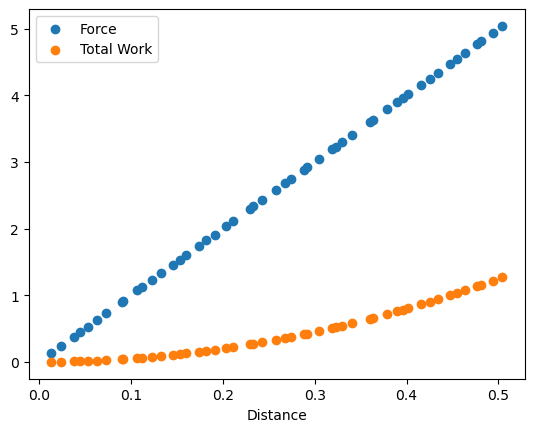

1.2691430000000001


In [43]:
#Loads in the text and dividing it into 2 lists to make my life easier
forcesx = np.loadtxt("//wsl.localhost/Ubuntu/home/benma/Phys230/CompPhys26/Labs/forces.txt")
forces = forcesx[:,1]
distances = forcesx[:,0]

# Define sum variable
S = 0
totalwork = [0]
#Integrate using the trapezoidal rule
for k in range(1,len(forces)):
    S += (1/2) * (forces[k]+forces[k-1]) * (abs(distances[k]-distances[k-1])) #This is 1/2 * first length*second length*h
    totalwork.append(S)
#Plotting distance and force
plt.scatter(distances,forces, label="Force")
plt.scatter(distances,totalwork, label="Total Work")
#labes
plt.legend()
plt.xlabel("Distance")
#Printing!
plt.show()
print(S)

I start by loading in the the text file. Then I split the text file into the two columns, one for distances and one for forces. Then I define a variable for the sum (S). I define an list that start with 0 for total work. I proceed to go through all values of k from 1 to N-1, where N is the len of the forces list. For every value, I find the area of the trapezoid, by taking the first length (forces at k) and multiplying by the second length (forces at k-1) and then multiply by 1/2, before finally dividing by the height which is the distance at k subtracted by the distance at k-1. Then I print S. afterwards, I plot distance against force and total work using the scatter plot. I added tons of labels. 